In [69]:
from tiingo import TiingoClient

# Tiingo API key
key = "f606f8b1f1e79d1b9a5d7504f64b511133828983"

# Initialize the Tiingo client
config = {
    'api_key': key,
    'session': True
}
client = TiingoClient(config)

start_date = '2015-06-22'
end_date = '2023-06-22'

# Get the historical data for AAPL from Tiingo
df = client.get_dataframe('AAPL', startDate=start_date, endDate=end_date, frequency='daily')

# Optionally, you can sort the DataFrame by date in ascending order
df.sort_index(ascending=True, inplace=True)


In [70]:
df.to_csv('AAPL.csv')

In [71]:
import pandas as pd

In [72]:
df = pd.read_csv('AAPL.csv')


In [73]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
2008,2023-06-13 00:00:00+00:00,183.31,184.15,182.44,182.80,54929129,183.31,184.15,182.44,182.80,54929129,0.0,1.0
2009,2023-06-14 00:00:00+00:00,183.95,184.39,182.02,183.37,57462882,183.95,184.39,182.02,183.37,57462882,0.0,1.0
2010,2023-06-15 00:00:00+00:00,186.01,186.52,183.78,183.96,65433166,186.01,186.52,183.78,183.96,65433166,0.0,1.0
2011,2023-06-16 00:00:00+00:00,184.92,186.99,184.27,186.73,101256225,184.92,186.99,184.27,186.73,101256225,0.0,1.0
2012,2023-06-20 00:00:00+00:00,185.01,186.10,184.41,184.41,49799092,185.01,186.10,184.41,184.41,49799092,0.0,1.0


In [74]:
df1 = df.reset_index()['close']

In [75]:
df1.shape

(2013,)

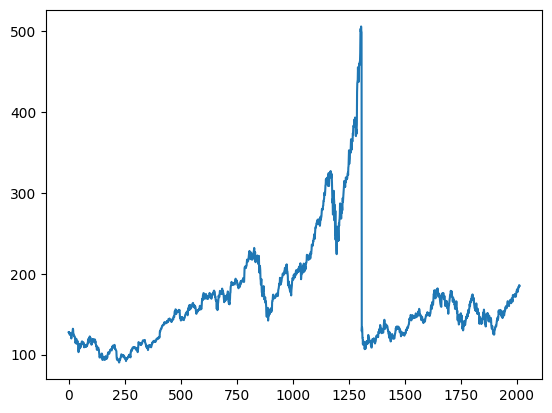

In [76]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [77]:
import numpy as np

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

df1_reshaped = np.ravel(df1)
df1_scaled = scaler.fit_transform(df1_reshaped.reshape(-1, 1))

df1 = df1_scaled.reshape(df1.shape)

In [81]:
print(df1)

[0.08964522 0.08825015 0.09084787 ... 0.23011425 0.22749248 0.22770896]


In [85]:
## pre-process the data

training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size], df1[training_size:]


In [86]:
training_size,test_size

(1308, 705)

In [94]:
## convert an array of values into dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:i + time_step]
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)


In [95]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [102]:
## reshape inputs to [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [106]:
## creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [111]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [112]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size=64, verbose = 1)

Epoch 1/100
19/19 [==============================] - 9s 190ms/step - loss: 0.0180 - val_loss: 8.3630e-04
Epoch 2/100
19/19 [==============================] - 3s 136ms/step - loss: 0.0017 - val_loss: 3.3934e-04
Epoch 3/100
19/19 [==============================] - 2s 129ms/step - loss: 8.8959e-04 - val_loss: 3.7570e-04
Epoch 4/100
19/19 [==============================] - 3s 155ms/step - loss: 8.0233e-04 - val_loss: 3.2244e-04
Epoch 5/100
19/19 [==============================] - 2s 131ms/step - loss: 7.7623e-04 - val_loss: 3.0617e-04
Epoch 6/100
19/19 [==============================] - 3s 150ms/step - loss: 6.3495e-04 - val_loss: 2.8573e-04
Epoch 7/100
19/19 [==============================] - 3s 135ms/step - loss: 5.8554e-04 - val_loss: 3.1691e-04
Epoch 8/100
19/19 [==============================] - 2s 131ms/step - loss: 6.0600e-04 - val_loss: 2.7288e-04
Epoch 9/100
19/19 [==============================] - 2s 132ms/step - loss: 5.9943e-04 - val_loss: 3.2368e-04
Epoch 10/100
19/19 [=======

19/19 [==============================] - 2s 130ms/step - loss: 1.8321e-04 - val_loss: 1.1531e-04
Epoch 76/100
19/19 [==============================] - 2s 131ms/step - loss: 2.0708e-04 - val_loss: 1.1696e-04
Epoch 77/100
19/19 [==============================] - 2s 130ms/step - loss: 1.8752e-04 - val_loss: 1.1354e-04
Epoch 78/100
19/19 [==============================] - 2s 128ms/step - loss: 1.9075e-04 - val_loss: 1.0502e-04
Epoch 79/100
19/19 [==============================] - 2s 129ms/step - loss: 1.9986e-04 - val_loss: 1.0995e-04
Epoch 80/100
19/19 [==============================] - 2s 125ms/step - loss: 1.6667e-04 - val_loss: 9.7151e-05
Epoch 81/100
19/19 [==============================] - 3s 139ms/step - loss: 1.6686e-04 - val_loss: 1.0692e-04
Epoch 82/100
19/19 [==============================] - 2s 123ms/step - loss: 1.8893e-04 - val_loss: 1.4468e-04
Epoch 83/100
19/19 [==============================] - 2s 124ms/step - loss: 2.1298e-04 - val_loss: 1.2807e-04
Epoch 84/100
19/19 [===

In [115]:
import tensorflow as tf

In [116]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

19/19 [==============================] - 0s 22ms/step


In [117]:
## tranform back to original matrix
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [120]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

0.0122775400012896

In [121]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.00916507934848946

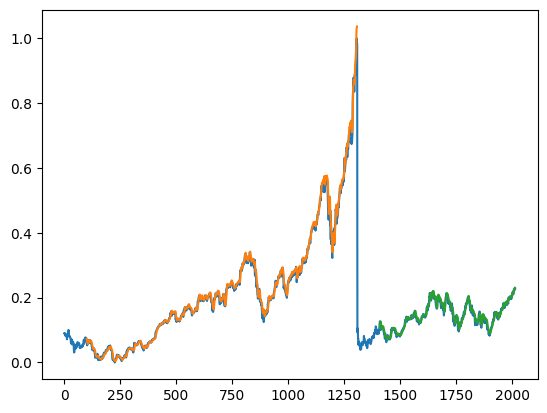

In [124]:
# Reshape df1 to have two dimensions
df1_reshaped = df1.reshape(-1, 1)

# Plotting code
look_back = 100
trainPredictPlot = np.empty_like(df1_reshaped)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df1_reshaped)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1_reshaped) - 1, :] = test_predict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1_reshaped))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [125]:
len(test_data)

705

In [126]:

x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 364)

In [127]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [128]:
temp_input

[0.19641611545399879,
 0.1968250150330727,
 0.19687312086590497,
 0.20382441371016236,
 0.20490679494888753,
 0.19687312086590497,
 0.1989897775105231,
 0.1911244738424534,
 0.18253758268190012,
 0.1784004810583283,
 0.17334936861094408,
 0.17144918821407096,
 0.16702345159350568,
 0.16680697534576067,
 0.16567648827420323,
 0.19239927841250754,
 0.2031028262176789,
 0.20269392663860497,
 0.20565243535778716,
 0.19858087793144918,
 0.19735417919422726,
 0.19559831629585084,
 0.20322309079975948,
 0.20671076368009622,
 0.19670475045099217,
 0.18833433553818396,
 0.18891160553217073,
 0.1983162958508719,
 0.1977390258568852,
 0.18891160553217073,
 0.18511124473842455,
 0.1779434756464221,
 0.16772098616957304,
 0.17414311485267592,
 0.17921828021647623,
 0.17986770895971138,
 0.17524954900781714,
 0.18333132892363196,
 0.18253758268190012,
 0.17517739025856882,
 0.1658689116055322,
 0.1613950691521347,
 0.17464822609741426,
 0.16399278412507517,
 0.1548767288033674,
 0.14499098015634393,

In [146]:
lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) >= 100:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i+1, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i+1, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i+1, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


1 day input [0.13989176 0.14463019 0.1497294  0.15069152 0.15757066 0.15552616
 0.16129886 0.16582081 0.16233313 0.16497895 0.16815394 0.16341551
 0.16190018 0.16940469 0.1732291  0.17933854 0.18239327 0.18109441
 0.17659651 0.17876127 0.17243536 0.16947685 0.16779314 0.18092604
 0.18008419 0.18013229 0.18311485 0.18590499 0.18354781 0.17962718
 0.18037282 0.17662057 0.17659651 0.18778112 0.19083584 0.19061936
 0.18809381 0.18547204 0.18147925 0.20019242 0.20002405 0.1958629
 0.20015634 0.20062538 0.19778713 0.19658449 0.19658449 0.19807577
 0.20375225 0.20401684 0.20170776 0.19535779 0.19603127 0.19879735
 0.20466627 0.20916416 0.2090439  0.21587492 0.21794348 0.21464823
 0.21375827 0.21041491 0.21702946 0.21796753 0.2247745  0.22361996
 0.22515935 0.23011425 0.22749248 0.22770896 0.23296537 0.23431484
 0.23614922 0.23822056 0.24040125 0.24264565 0.24493937 0.24727643
 0.24965245 0.25206354 0.25450701 0.2569814  0.25948653 0.2620233
 0.26459333 0.26719883 0.26984236 0.27252632 0.27525

9 day output [[0.34053516]]
10 day input [0.16497895 0.16815394 0.16341551 0.16190018 0.16940469 0.1732291
 0.17933854 0.18239327 0.18109441 0.17659651 0.17876127 0.17243536
 0.16947685 0.16779314 0.18092604 0.18008419 0.18013229 0.18311485
 0.18590499 0.18354781 0.17962718 0.18037282 0.17662057 0.17659651
 0.18778112 0.19083584 0.19061936 0.18809381 0.18547204 0.18147925
 0.20019242 0.20002405 0.1958629  0.20015634 0.20062538 0.19778713
 0.19658449 0.19658449 0.19807577 0.20375225 0.20401684 0.20170776
 0.19535779 0.19603127 0.19879735 0.20466627 0.20916416 0.2090439
 0.21587492 0.21794348 0.21464823 0.21375827 0.21041491 0.21702946
 0.21796753 0.2247745  0.22361996 0.22515935 0.23011425 0.22749248
 0.22770896 0.23296537 0.23431484 0.23614922 0.23822056 0.24040125
 0.24264565 0.24493937 0.24727643 0.24965245 0.25206354 0.25450701
 0.2569814  0.25948653 0.2620233  0.26459333 0.26719883 0.26984236
 0.27252632 0.27525327 0.27802518 0.28084385 0.28371069 0.28662685
 0.28959298 0.29260972 

19 day output [[0.38274413]]
20 day input [0.17876127 0.17243536 0.16947685 0.16779314 0.18092604 0.18008419
 0.18013229 0.18311485 0.18590499 0.18354781 0.17962718 0.18037282
 0.17662057 0.17659651 0.18778112 0.19083584 0.19061936 0.18809381
 0.18547204 0.18147925 0.20019242 0.20002405 0.1958629  0.20015634
 0.20062538 0.19778713 0.19658449 0.19658449 0.19807577 0.20375225
 0.20401684 0.20170776 0.19535779 0.19603127 0.19879735 0.20466627
 0.20916416 0.2090439  0.21587492 0.21794348 0.21464823 0.21375827
 0.21041491 0.21702946 0.21796753 0.2247745  0.22361996 0.22515935
 0.23011425 0.22749248 0.22770896 0.23296537 0.23431484 0.23614922
 0.23822056 0.24040125 0.24264565 0.24493937 0.24727643 0.24965245
 0.25206354 0.25450701 0.2569814  0.25948653 0.2620233  0.26459333
 0.26719883 0.26984236 0.27252632 0.27525327 0.27802518 0.28084385
 0.28371069 0.28662685 0.28959298 0.29260972 0.29567751 0.29879662
 0.30196759 0.30519083 0.30846709 0.31179708 0.31518197 0.31862283
 0.32212126 0.325678

29 day output [[0.43389824]]
30 day input [0.17962718 0.18037282 0.17662057 0.17659651 0.18778112 0.19083584
 0.19061936 0.18809381 0.18547204 0.18147925 0.20019242 0.20002405
 0.1958629  0.20015634 0.20062538 0.19778713 0.19658449 0.19658449
 0.19807577 0.20375225 0.20401684 0.20170776 0.19535779 0.19603127
 0.19879735 0.20466627 0.20916416 0.2090439  0.21587492 0.21794348
 0.21464823 0.21375827 0.21041491 0.21702946 0.21796753 0.2247745
 0.22361996 0.22515935 0.23011425 0.22749248 0.22770896 0.23296537
 0.23431484 0.23614922 0.23822056 0.24040125 0.24264565 0.24493937
 0.24727643 0.24965245 0.25206354 0.25450701 0.2569814  0.25948653
 0.2620233  0.26459333 0.26719883 0.26984236 0.27252632 0.27525327
 0.27802518 0.28084385 0.28371069 0.28662685 0.28959298 0.29260972
 0.29567751 0.29879662 0.30196759 0.30519083 0.30846709 0.31179708
 0.31518197 0.31862283 0.32212126 0.32567874 0.32929707 0.33297795
 0.33672333 0.34053516 0.3444154  0.34836599 0.35238901 0.35648629
 0.3606599  0.3649118

In [133]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [136]:

len(df1)

2013

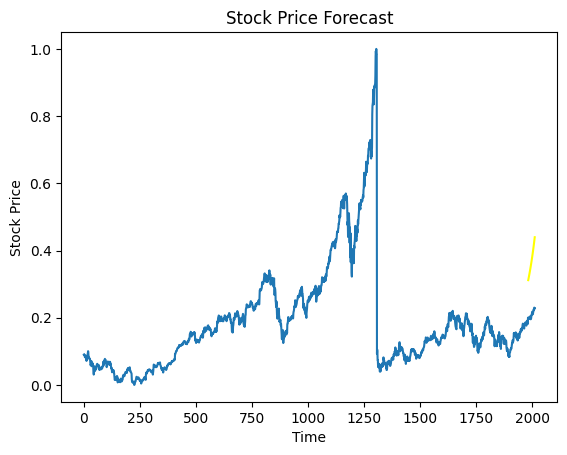

In [152]:
import matplotlib.pyplot as plt

# Previous data
plt.plot(df1)

# Forecasted data
day_new = np.arange(len(df1), len(df1) + 30)
day_pred = np.arange(len(df1) - len(lst_output), len(df1))

plt.plot(day_pred, scaler.inverse_transform(lst_output), color='re')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Forecast')

plt.show()
